In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [31]:
input_file = './polygonized.gpkg'
data = gpd.read_file(input_file)

In [32]:
data.head()

,DN,geometry
0,1,"POLYGON ((1164350.724 1906835.179, 1164350.724..."
1,1,"POLYGON ((1165430.724 1906775.179, 1165430.724..."
2,1,"POLYGON ((1164530.724 1906745.179, 1164530.724..."
3,1,"POLYGON ((1165070.724 1906745.179, 1165070.724..."
4,1,"POLYGON ((1165460.724 1906745.179, 1165460.724..."


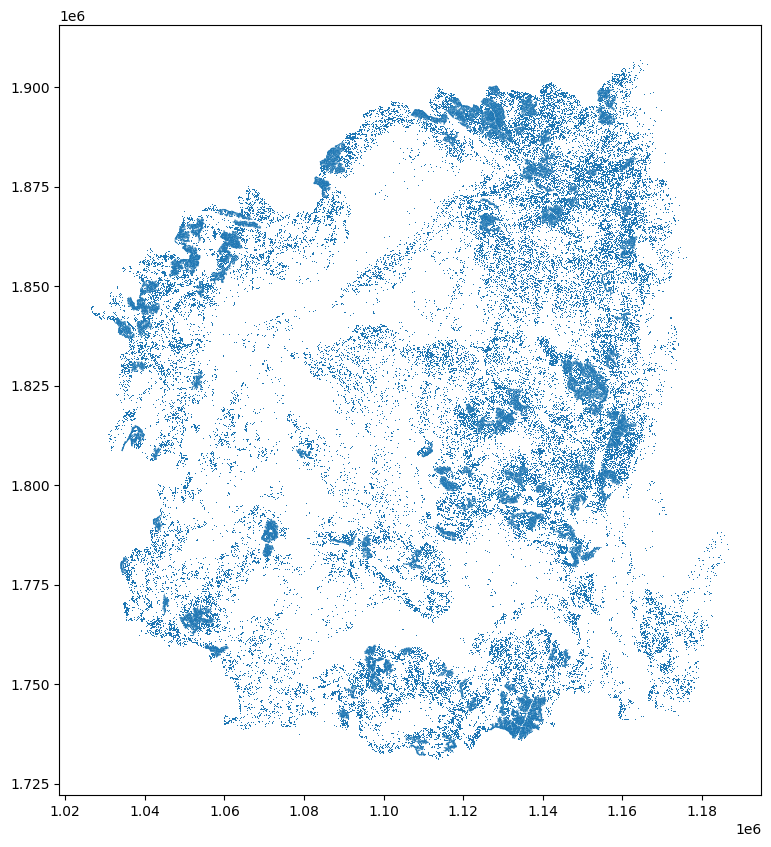

In [5]:
f, ax = plt.subplots(1, figsize=(10, 10))
data[data['DN'] == 1].plot(ax = ax)
plt.savefig("High Slope Visualization.jpg")
plt.show()

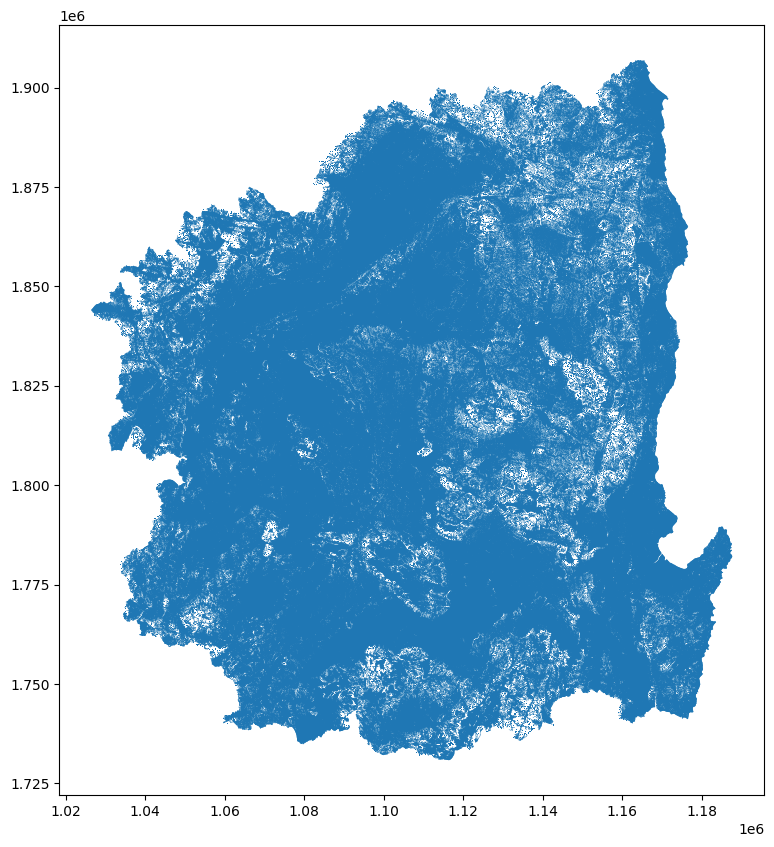

In [6]:
f, ax = plt.subplots(1, figsize=(10, 10))
data[data['DN'] != 1].plot(ax = ax)
plt.savefig("Low Slope Visualization.jpg")
plt.show()

In [15]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [7]:
from getdata import GetData

In [33]:
# API 인증키
key = "D9C2C32A-110D-3F33-846F-A831EE3AF020"
# GetData 인스턴스 생성
GSBD_DB_geo_data = GetData(key, 'GSBD_DG_geo.csv')

In [35]:
korea = GSBD_DB_geo_data.get_lon_lat("sido")
danger = GSBD_DB_geo_data.get_lon_lat("dng")
restricted = GSBD_DB_geo_data.get_lon_lat("res")
prohibited = GSBD_DB_geo_data.get_lon_lat("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_ADSIDO_INFO&columns=ctprvn_cd, ctp_kor_nm, ctp_eng_nm, ag_geom&geomFilter=BOX(128.1198, 35.6516, 130.8899, 37.4835)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 130.8899, 37.4835)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 130.8899, 37.4835)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2

In [45]:
from matplotlib import pyplot
from shapely.geometry.polygon import LinearRing, Polygon
from descartes import PolygonPatch

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

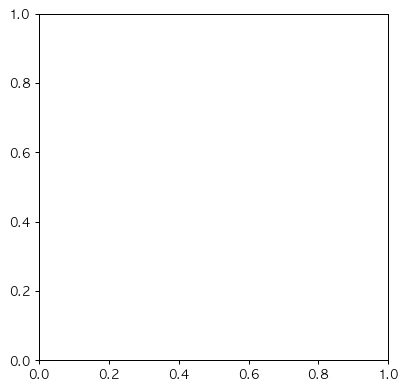

In [47]:
fig = plt.figure(1, figsize=(5,5), dpi=90)
ring_mixed = Polygon([(0, 0), (0, 2), (1, 1),
    (2, 2), (2, 0), (1, 0.8), (0, 0)])
ax = fig.add_subplot(111)
ring_patch = PolygonPatch(ring_mixed)
ax.add_patch(ring_patch)

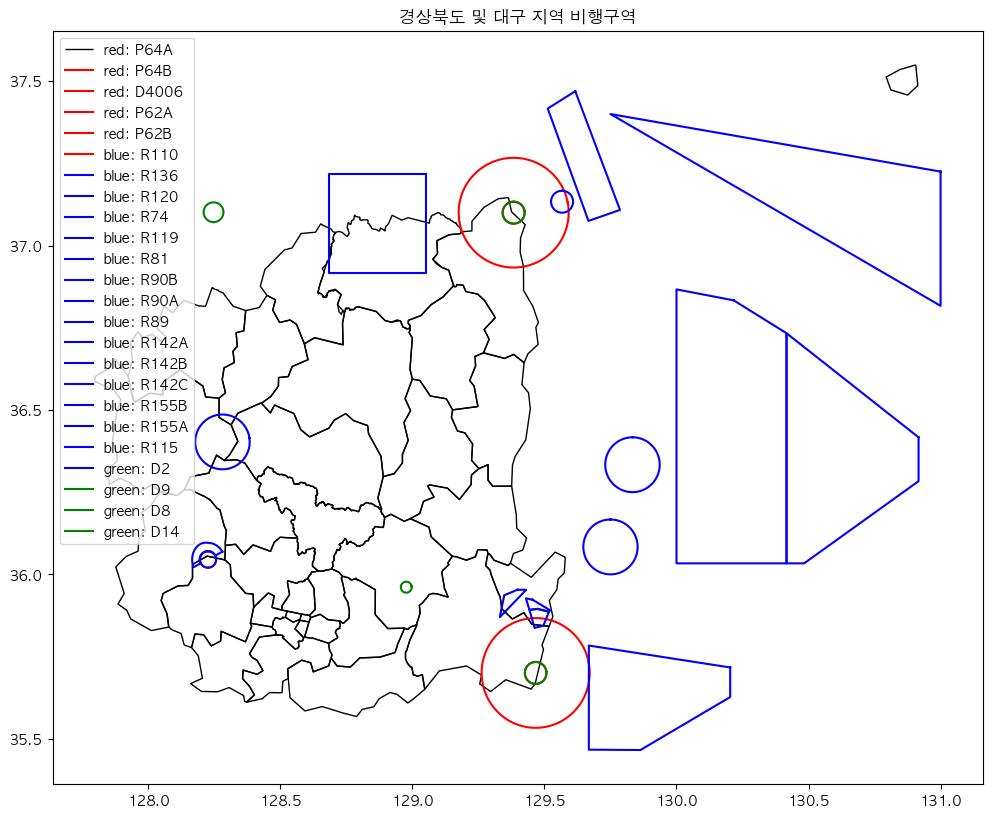

<Axes: >

<Figure size 640x480 with 0 Axes>

In [39]:
# save = True: 사진 저장
GSBD_DB_geo_data.plt_visualize(prohibited, restricted, danger,  save=False)
data[data['DN'] == 1].plot(ax = ax)

In [ ]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")